<a href="https://colab.research.google.com/github/Metallicode/Math/blob/main/DBSCAN_Hyper_Parameters.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#DBSCAN Hyper-Parameters

In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import make_blobs
from sklearn.cluster import DBSCAN

In [42]:
blobs_dataset = make_blobs(n_samples=200, centers=2, random_state=101)

In [43]:
blobs_dataset = np.vstack((blobs_dataset[0], [[-8,5],[7,-6]]))

In [44]:
blobs_X1, blobs_X2 = blobs_dataset[:, 0], blobs_dataset[:, 1]

<Axes: >

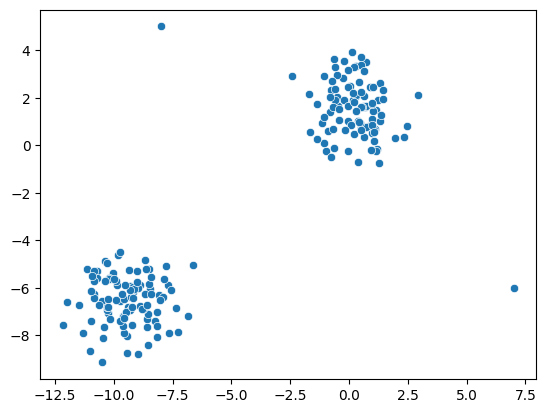

In [45]:
sns.scatterplot(x=blobs_X1, y=blobs_X2)

##Display Model

In [86]:
def display_model(model, blobs_X1, blobs_X2):
  labels = model.fit_predict(np.column_stack((blobs_X1, blobs_X2)))
  sns.scatterplot(x=blobs_X1, y=blobs_X2, hue=labels, palette='Set1')
  print(sum(labels == -1))
  print(f"percent of outliers: {100 * (sum(labels == -1)/len(labels))}")

In [53]:
dbscan_model = DBSCAN()

In [ ]:
blobs_X1

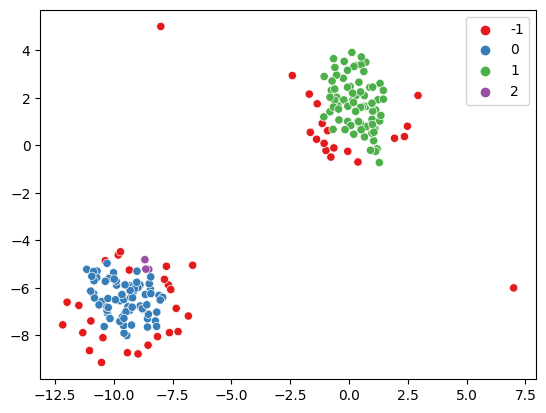

In [57]:
display_model(dbscan_model, blobs_X1, blobs_X2)

###epsilon

The `eps` parameter plays a critical role in how the algorithm determines clusters.


1. **Definition of ε (eps) Parameter**:
   - `eps` stands for epsilon and represents the maximum distance between two samples for one to be considered as in the neighborhood of the other.
   
2. **Impact of Small `eps` (e.g., 0.001)**:
   - With a very small `eps` value:
     - Fewer data points will be considered as part of the same neighborhood.
     - Many data points may be labeled as noise (i.e., not belonging to any cluster).
     - Clusters will be smaller and more fragmented.
     - The algorithm might identify numerous tiny clusters or may fail to identify meaningful clusters at all.
     
3. **Impact of Large `eps` (e.g., 10)**:
   - With a large `eps` value:
     - More data points will be seen as part of the same neighborhood.
     - There's a higher chance of different clusters merging into a single, larger cluster.
     - Fewer data points are labeled as noise.
     - The algorithm might recognize a smaller number of large clusters, potentially overlooking finer-grained cluster structures.

4. **Choosing the Right `eps`**:
   - The appropriate value of `eps` is highly data-dependent. It's essential to understand the scale and distribution of your data before selecting an `eps` value.
   - A common technique to find a suitable `eps` value is using the k-distance graph. Plotting the distance to the k-th nearest neighbor for each point (sorted) can help identify an "elbow" in the graph, which can be a good starting point for setting `eps`.

5. **Summary**:
   - `DBSCAN(eps=0.001)` will look for clusters in very close neighborhoods, which can result in many data points being classified as noise and potential over-segmentation of the data.
   - `DBSCAN(eps=10)` will create more inclusive, larger clusters, but there's a risk of merging distinct clusters if the `eps` is set too high.


3
percent of outliers: 1.4851485148514851


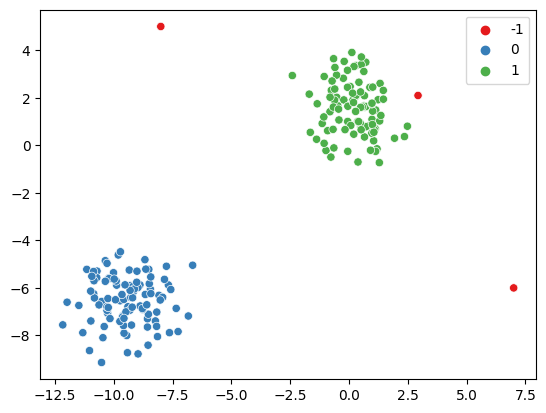

In [88]:
#using a very small eps value
dbscan_model = DBSCAN(eps=1.2)
display_model(dbscan_model, blobs_X1, blobs_X2)


##Compare different eps values

In [90]:
outliers_percent = []
outliers_n = []

for eps in np.linspace(0.001, 3, 100):
  dbscan_model = DBSCAN(eps=eps)
  labels = dbscan_model.fit(np.column_stack((blobs_X1, blobs_X2)))
  outliers_n.append(sum(dbscan_model.labels_ == -1))
  outliers_percent.append(100 * sum(dbscan_model.labels_ == -1)/len(dbscan_model.labels_))


<Axes: >

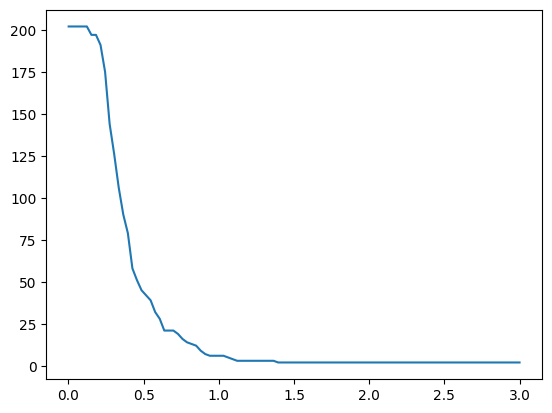

In [91]:
sns.lineplot(x=np.linspace(0.001, 3, 100),y=outliers_n )

<Axes: >

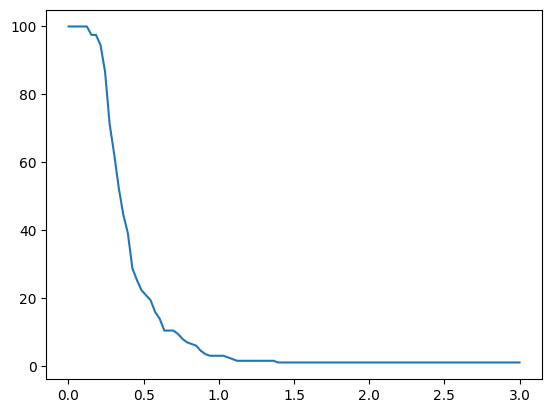

In [92]:
sns.lineplot(x=np.linspace(0.001, 3, 100),y=outliers_percent )